Evaluation:Root Mean Squared Logarithmic Error ***RMSLE***

\\( \sqrt{\frac{1}{n} \sum_{i=1}^n (\log(p_i + 1) - \log(a_i+1))^2 } \\)



# 1、数据导入

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')
data_train[:3]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


# 2、数据探索

In [3]:
print(data_train.info())
print('----------------------------------')
print(data_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.6+ KB
None
----------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
datetime      6493 non-null object
season        6493 non-null int64
holiday       6493 non-null int64
workingday    6493 non-null int64
weather       6493 non-null int64
temp          6493 non-null float64
atemp         6493 non-null float64
humidity  

----无缺失数据，并且可以发现测试数据少了三列，分别是casual、registered、count----

In [4]:
data_all = pd.concat([data_train.ix[:,:9], data_test])
data_all.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.028770,0.682721,1.425283,20.376474,23.788755,62.722884,12.736540
std,1.106918,0.167165,0.465431,0.639357,7.894801,8.592511,19.292983,8.196795
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,48.000000,7.001500
50%,3.000000,0.000000,1.000000,1.000000,20.500000,24.240000,63.000000,12.998000
75%,3.000000,0.000000,1.000000,2.000000,27.060000,31.060000,78.000000,16.997900
max,4.000000,1.000000,1.000000,4.000000,41.000000,50.000000,100.000000,56.996900


In [5]:
data_train.ix[:,-3:].describe()

,casual,registered,count
count,10886.000000,10886.000000,10886.000000
mean,36.021955,155.552177,191.574132
std,49.960477,151.039033,181.144454
min,0.000000,0.000000,1.000000
25%,4.000000,36.000000,42.000000
50%,17.000000,118.000000,145.000000
75%,49.000000,222.000000,284.000000
max,367.000000,886.000000,977.000000


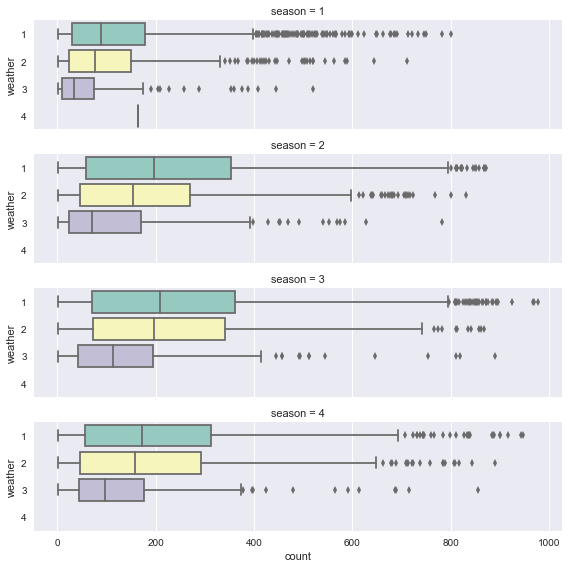

In [6]:
sns.factorplot(x='count', y='weather',row='season', data=data_train, orient='h',size=2,aspect=4, palette="Set3", kind='box')

----四季来看二三季度骑车人数都挺多，其次第四季度，第一季度骑车人数明显减少----

----天气来看，天气对骑车影响非常大，1-4汽车人数递减，且天气为4时，几乎无人骑车----

In [7]:
data_train['clock'] = data_train.datetime.map(lambda x: x[-8:-6])

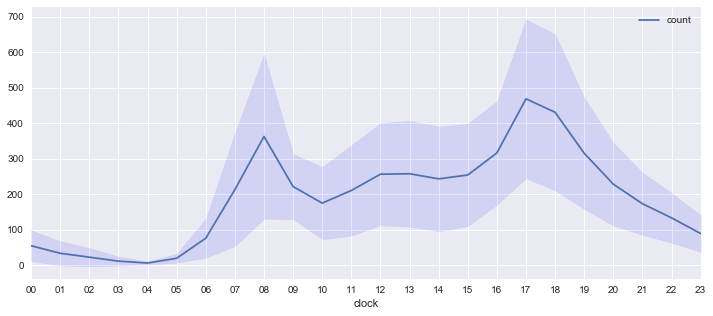

In [89]:
clock_count_mean = data_train.groupby('clock').agg({'count': np.mean})
clock_count_std = data_train.groupby('clock').agg({'count': np.std})
fig, ax = plt.subplots(figsize =(12, 5))
clock_count_mean.plot(xticks=np.arange(24), ax=ax)
plt.fill_between(np.arange(24), clock_count_mean['count'] - clock_count_std['count'],
                 clock_count_mean['count'] + clock_count_std['count'], alpha=0.1,color="b")

----从时间点上来看，存在两个高峰期分别是早上八点和傍晚五六点钟----

In [134]:
import datetime
data_train["weekday"] = data_train.datetime.map(lambda x : str(datetime.datetime.strptime(x[:10],"%Y-%m-%d").weekday()))

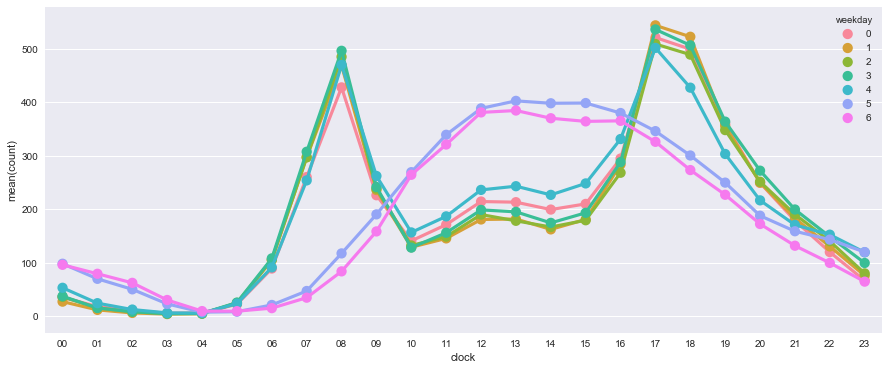

In [135]:
hourAggregated = data_train.groupby(["clock","weekday"]).agg({'count': np.mean}).reset_index()
fig, ax = plt.subplots(figsize=(15,6))
sns.pointplot(x=hourAggregated["clock"], y=hourAggregated["count"], hue=hourAggregated["weekday"], data=hourAggregated, join=True, ax=ax)
#ax.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across Weekdays",label='big')

In [104]:
data_train['month'] = data_train.datetime.map(lambda x: x[5:7])

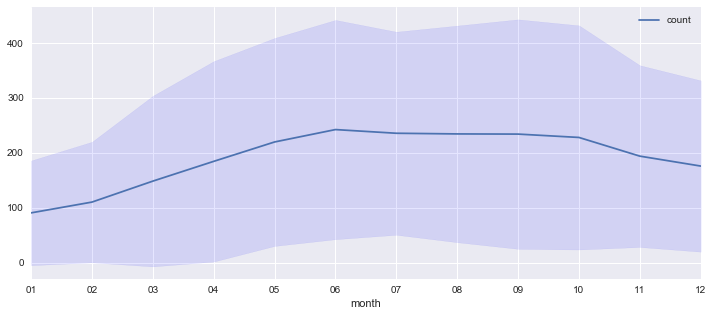

In [105]:
month_count_mean = data_train.groupby('month').agg({'count': np.mean})
month_count_std = data_train.groupby('month').agg({'count': np.std})
fig, ax = plt.subplots(figsize =(12, 5))
month_count_mean.plot(xticks=np.arange(12), ax=ax)
plt.fill_between(np.arange(12), month_count_mean['count'] - month_count_std['count'],
                 month_count_mean['count'] + month_count_std['count'], alpha=0.1,color="b")

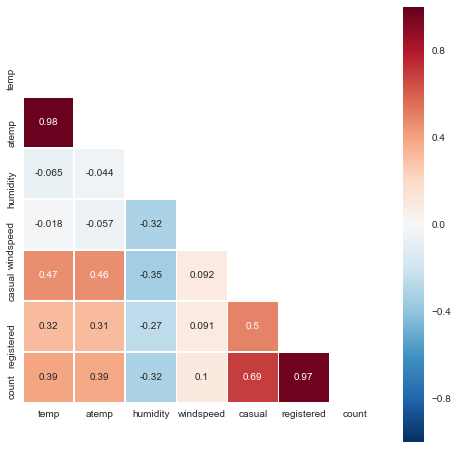

In [11]:
corr = data_train[["temp","atemp","humidity","windspeed", "casual","registered","count"]].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    fig, ax = plt.subplots(figsize=(8, 8))
    sns.heatmap(corr, mask=mask, vmax=1,linewidths=.5, square=True, ax=ax,annot=True)

2180


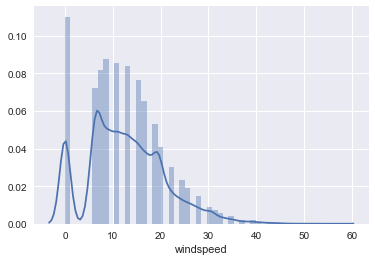

In [21]:
print(sum(data_all.windspeed == 0))
sns.distplot(data_all.windspeed)

----根据相关系数可以看到，count跟windspeed几乎没有相关性,可能是windspeed存在大量0值导致----

# 3、数据处理

In [136]:
data_all[:3]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,clock,month,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,00,01,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,01,01,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,02,01,5


In [144]:
data_all['clock'] = data_all.datetime.map(lambda x: x[-8:-6])
data_all["weekday"] = data_all.datetime.map(lambda x : str(datetime.datetime.strptime(x[:10],"%Y-%m-%d").weekday()))
data_all['month'] = data_all.datetime.map(lambda x: x[5:7])
data_all['year'] = data_all.datetime.map(lambda x: x[:4])


X_raw = data_all.drop(['datetime', 'season'], axis=1)

X = pd.get_dummies(X_raw)

encoded = list(X.columns)
print("%d total features after one-hot encoding." % (len(encoded)))

print(encoded)

52 total features after one-hot encoding.
['holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'clock_00', 'clock_01', 'clock_02', 'clock_03', 'clock_04', 'clock_05', 'clock_06', 'clock_07', 'clock_08', 'clock_09', 'clock_10', 'clock_11', 'clock_12', 'clock_13', 'clock_14', 'clock_15', 'clock_16', 'clock_17', 'clock_18', 'clock_19', 'clock_20', 'clock_21', 'clock_22', 'clock_23', 'month_01', 'month_02', 'month_03', 'month_04', 'month_05', 'month_06', 'month_07', 'month_08', 'month_09', 'month_10', 'month_11', 'month_12', 'weekday_0', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6', 'year_2011', 'year_2012']


In [145]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numerical = [ 'weather', 'temp', 'atemp', 'humidity', 'windspeed']
X[numerical] = scaler.fit_transform(X[numerical])

In [146]:
X.head()

,holiday,workingday,weather,temp,atemp,humidity,windspeed,clock_00,clock_01,clock_02,...,month_12,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,year_2011,year_2012
0,0,0,0.0,0.224490,0.2879,0.81,0.0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0,0,0.0,0.204082,0.2727,0.80,0.0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
2,0,0,0.0,0.204082,0.2727,0.80,0.0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
3,0,0,0.0,0.224490,0.2879,0.75,0.0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,0,0,0.0,0.224490,0.2879,0.75,0.0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [147]:
from sklearn.ensemble import RandomForestRegressor

windspeed_model = RandomForestRegressor()
data_wind0 = X[data_all.windspeed == 0]
data_wind_not0 = X[data_all.windspeed != 0]
windspeed_model.fit(data_wind_not0.drop('windspeed', axis=1), data_wind_not0.windspeed)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [148]:
wind0_values = windspeed_model.predict(data_wind0.drop('windspeed', axis=1))
X.loc[data_all.windspeed == 0, 'windspeed'] = wind0_values

0


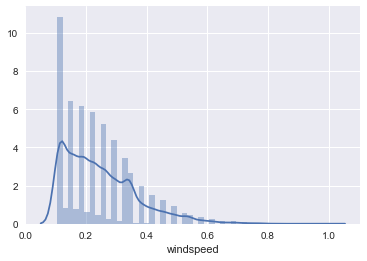

In [149]:
sns.distplot(X.windspeed)

In [150]:
y_train = data_train['count']
X_train = X[:len(y_train)]
X_test = X[len(y_train):]
print(X_train.shape, y_train.shape)
print(X_test.shape)

((10886, 52), (10886L,))
(6493, 52)


# 4、构建模型

In [165]:
def rmsle(y, y_):
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

scorer = make_scorer(rmsle)

In [183]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_predict = linear_reg.predict(X_train)
print("RMSLE Value For Linear Regression: ",rmsle(y_train, y_predict))
y_predict[y_predict < 0] = 0
print("RMSLE Value For Linear Regression: ",rmsle(y_train, y_predict))

y_train_log = np.log(y_train)
linear_reg.fit(X_train, y_train_log)
y_predict_log = linear_reg.predict(X_train)
print("RMSLE Value For Linear Regression(using log): ",rmsle(np.exp(y_train_log), np.exp(y_predict_log)))

('RMSLE Value For Linear Regression: ', inf)
('RMSLE Value For Linear Regression: ', 1.1163592263343549)
('RMSLE Value For Linear Regression(using log): ', 0.58327248228014317)


F:\Anaconda\lib\site-packages\ipykernel\__main__.py:3: RuntimeWarning: invalid value encountered in log
  app.launch_new_instance()
F:\Anaconda\lib\site-packages\ipykernel\__main__.py:3: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()
F:\Anaconda\lib\site-packages\ipykernel\__main__.py:4: RuntimeWarning: overflow encountered in square


In [178]:
print(pd.Series(np.exp(y_predict_log)).describe())
print('----------------------------')
print(pd.Series(y_predict).describe())

count    10886.000000
mean       176.856517
std        161.741857
min          1.164560
25%         43.359735
50%        139.966940
75%        261.492669
max       1140.318057
dtype: float64
----------------------------
count    10886.000000
mean       191.129157
std        150.859682
min       -193.000000
25%         78.000000
50%        186.000000
75%        297.500000
max        622.000000
dtype: float64
